📊 Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔍 Enter flower measurements to predict species:

✅ Predicted flower type: virginica


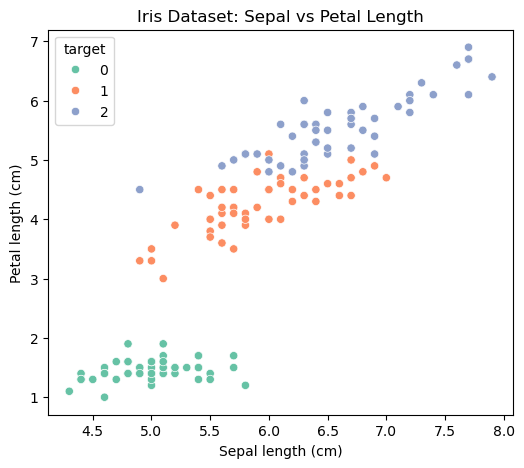

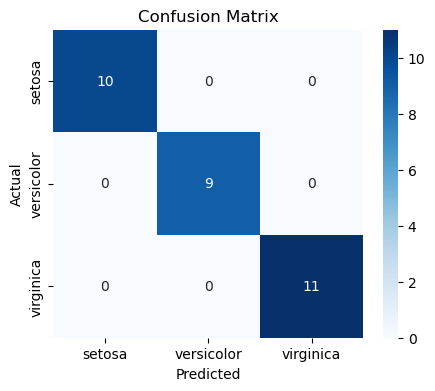

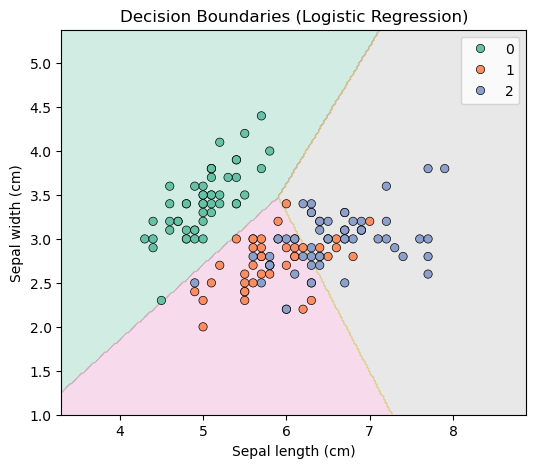

In [1]:
# # 🌸 Iris Flower Classification Project
# 
# **Objective:** Classify iris flowers into three species (*Setosa*, *Versicolor*, *Virginica*) based on sepal and petal measurements.
# 
# **Dataset:** Iris dataset from scikit-learn.
# 
# **Steps Covered:**
# 1. Load & explore the dataset
# 2. Split into training/testing sets
# 3. Train a Logistic Regression model
# 4. Evaluate performance
# 5. Predict custom user input
# 6. Visualize dataset, confusion matrix, and decision boundaries
# 7. Save the trained model

# ## Step 1 — Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# ## Step 2 — Load the Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
target_names = iris.target_names

# ## Step 3 — Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# ## Step 4 — Train the Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ## Step 5 — Predictions on Test Set
y_pred = model.predict(X_test)

# ## Step 6 — Model Evaluation
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# ## Step 7 — Predict Custom User Input
print("\n🔍 Enter flower measurements to predict species:")
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

prediction = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
print("\n✅ Predicted flower type:", target_names[prediction][0])

# ## Step 8 — Save the Model
joblib.dump(model, "iris_model.pkl")

# ## Step 9 — Dataset Visualization (Scatter Plot)
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=iris_df.iloc[:, 0],  # sepal length
    y=iris_df.iloc[:, 2],  # petal length
    hue=iris_df['target'],
    palette="Set2",
    legend='full'
)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Iris Dataset: Sepal vs Petal Length')
plt.show()

# ## Step 10 — Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ## Step 11 — Decision Boundary Visualization (First 2 Features)
X_vis = iris.data[:, :2]
y_vis = iris.target

model_boundary = LogisticRegression(max_iter=200)
model_boundary.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_boundary.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set2")
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=iris.target,
                palette="Set2", edgecolor='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Decision Boundaries (Logistic Regression)')
plt.show()
